In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df=pd.read_csv('business.retailsales.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [14]:
df.dropna()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


In [15]:
sales = df.groupby('Product Type').sum().sort_values('Gross Sales').reset_index()
sales

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Gift Baskets,1,19.50,0.00,0.00,19.50
1,Easter,1,38.00,-3.80,0.00,34.20
2,Textiles,43,1889.00,-112.90,-97.00,1679.10
3,Furniture,27,2034.00,-169.04,0.00,1864.96
4,One-of-a-Kind,12,2180.00,-71.99,0.00,2108.01
5,Fair Trade Gifts,110,2258.00,-53.33,0.00,2204.67
6,Skin Care,101,2609.50,-37.70,0.00,2571.80
7,Music,98,2643.50,-82.19,-142.41,2418.90
8,Recycled Art,99,3792.80,-88.64,0.00,3704.16
9,Kids,140,3838.00,-116.66,0.00,3721.34


Text(0.5, 1.0, 'total sales of different types of products')

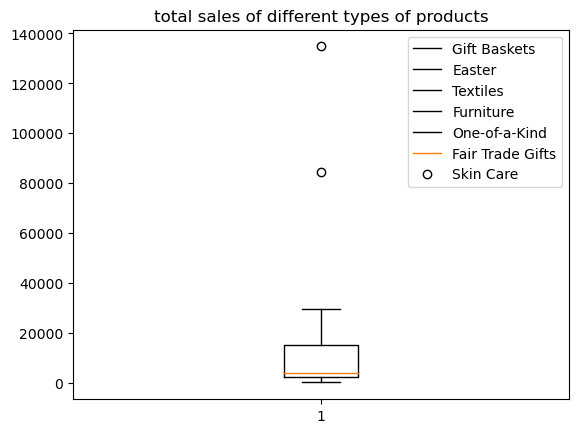

In [16]:
y=sales['Total Net Sales']
x=sales[ 'Product Type']
plt.boxplot(y)
plt.legend(x)
plt.title("total sales of different types of products")

Text(0.5, 1.0, 'distribution of netsales according to the product type')

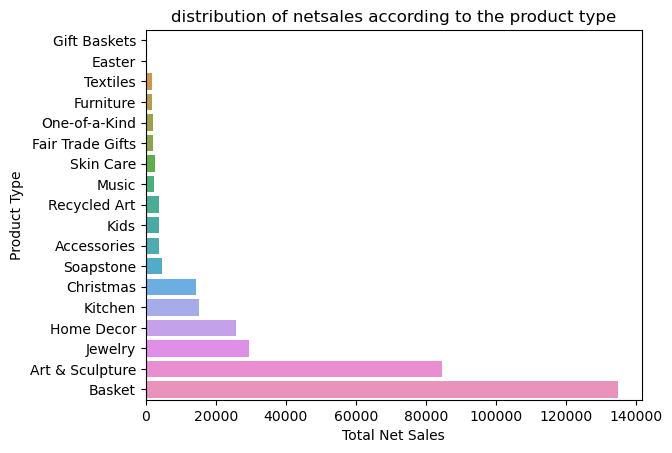

In [17]:
x=sales['Total Net Sales']
y=sales['Product Type']
sns.barplot(x=x,y=y)
plt.rcParams["figure.figsize"]=(20,40)
plt.title("distribution of netsales according to the product type")

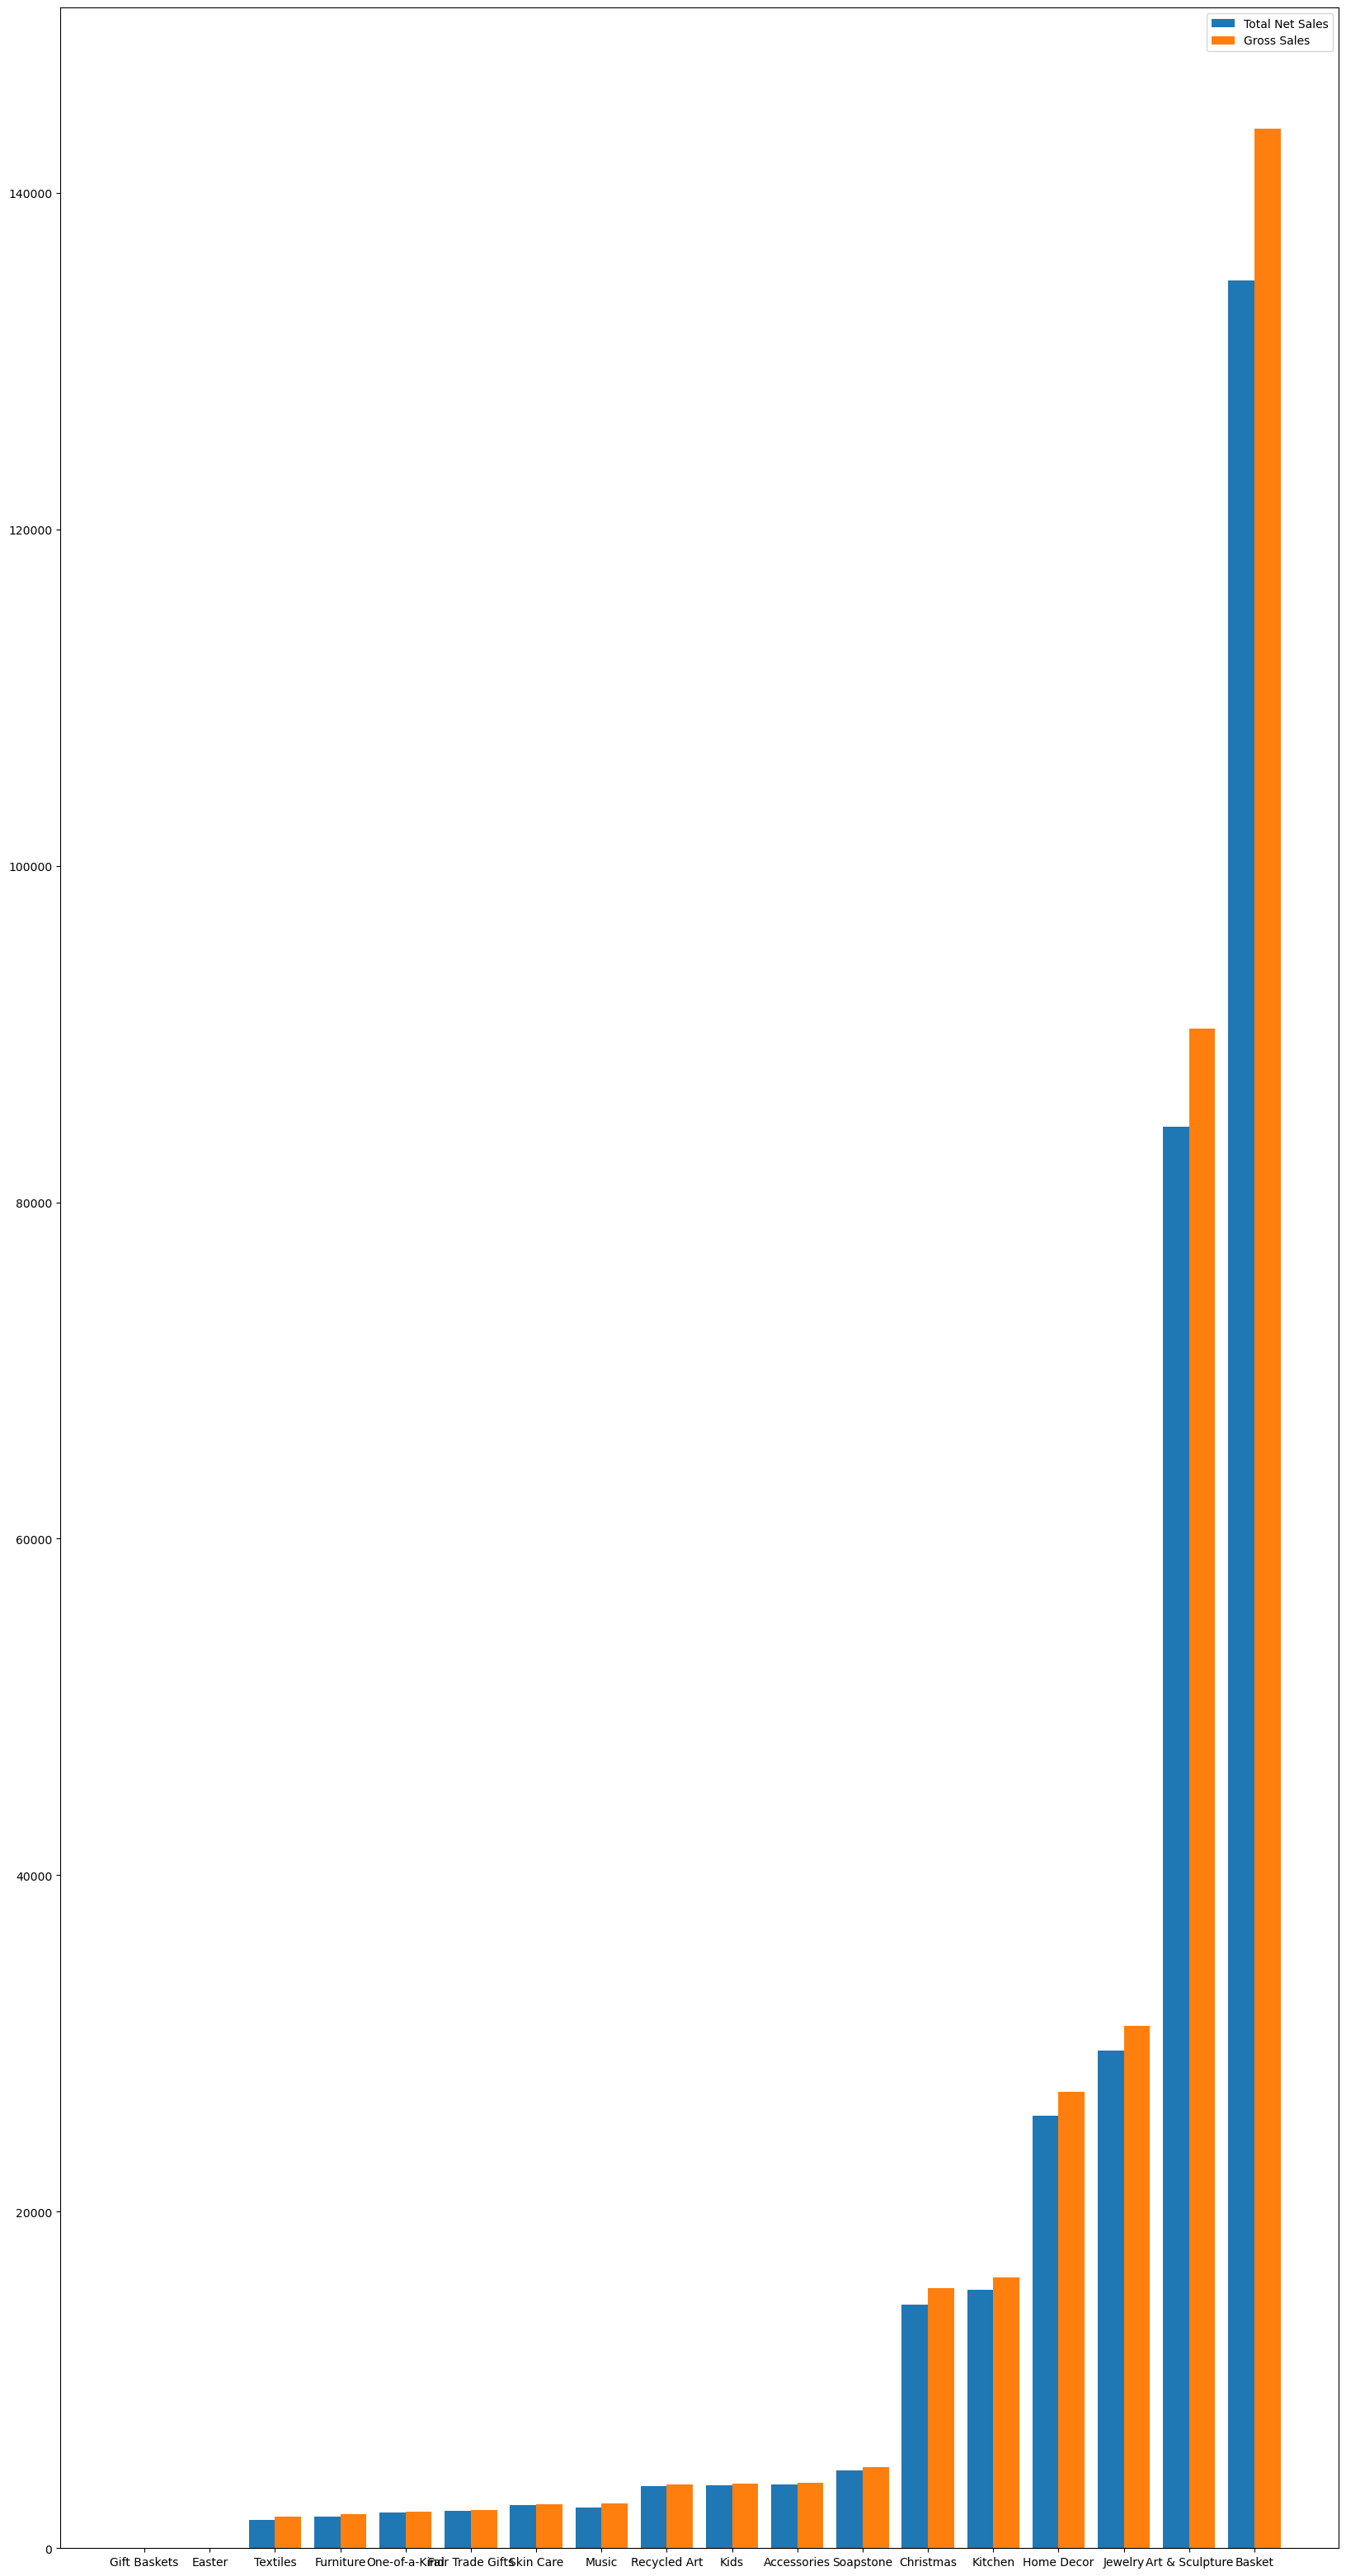

In [18]:
products=sales['Product Type']
x_axis = np.arange(len(products))
x=sales['Total Net Sales']
y=sales['Gross Sales']
plt.bar(x_axis -0.2,x, width=0.4, label = 'Total Net Sales')
plt.bar(x_axis +0.2,y , width=0.4, label = 'Gross Sales')
plt.xticks(x_axis, products)
plt.legend()
plt.show()
plt.rcParams["figure.figsize"]=(20,20)

Text(0.5, 1.0, 'gross sales quantity of each product')

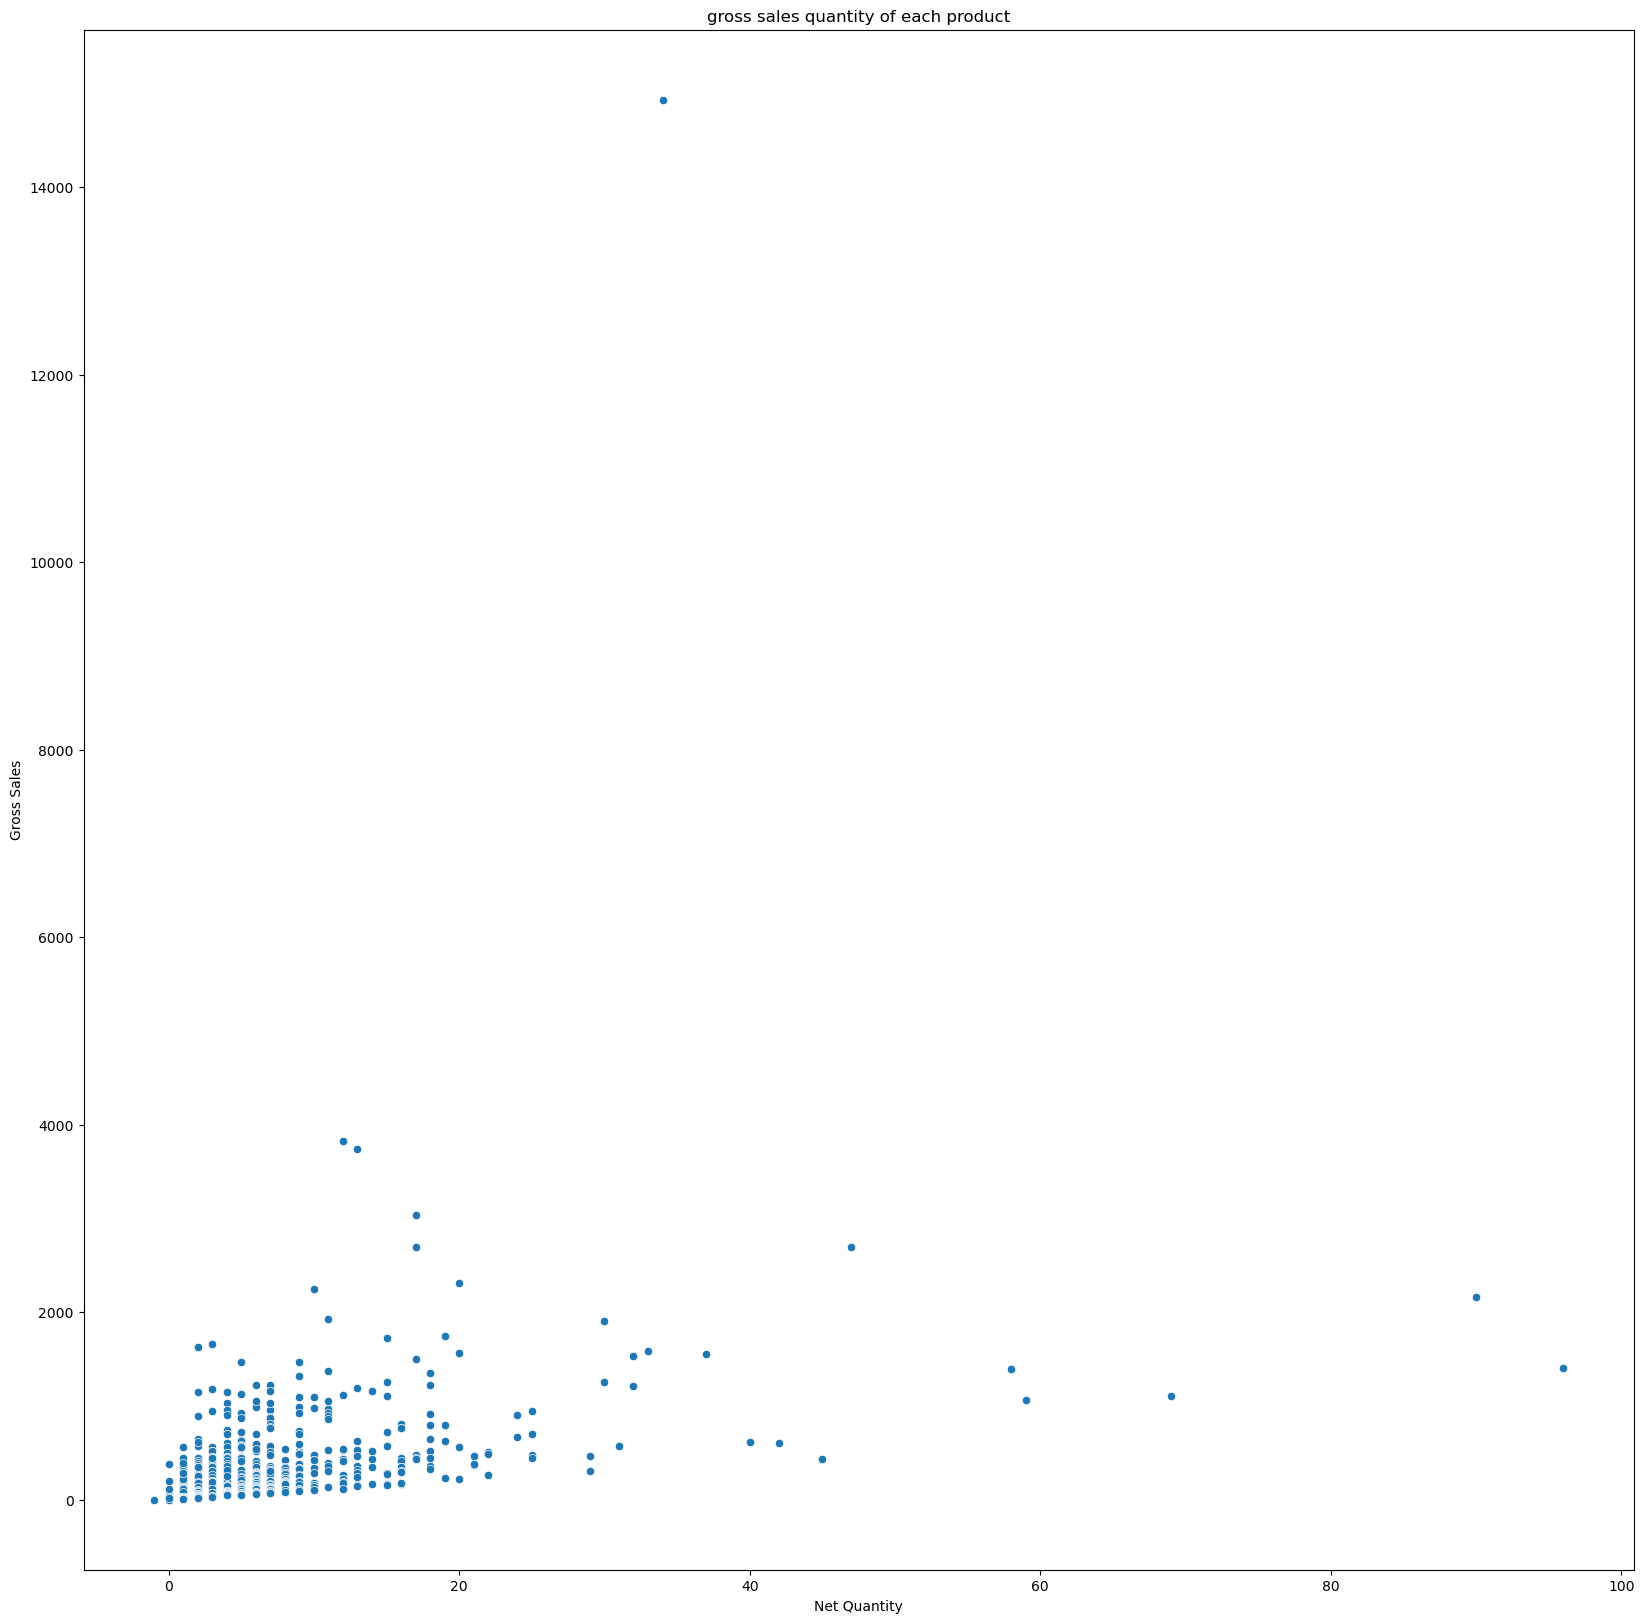

In [19]:
x=df['Net Quantity']
y=df['Gross Sales']
sns.scatterplot(x=x,y=y)
plt.title('gross sales quantity of each product')

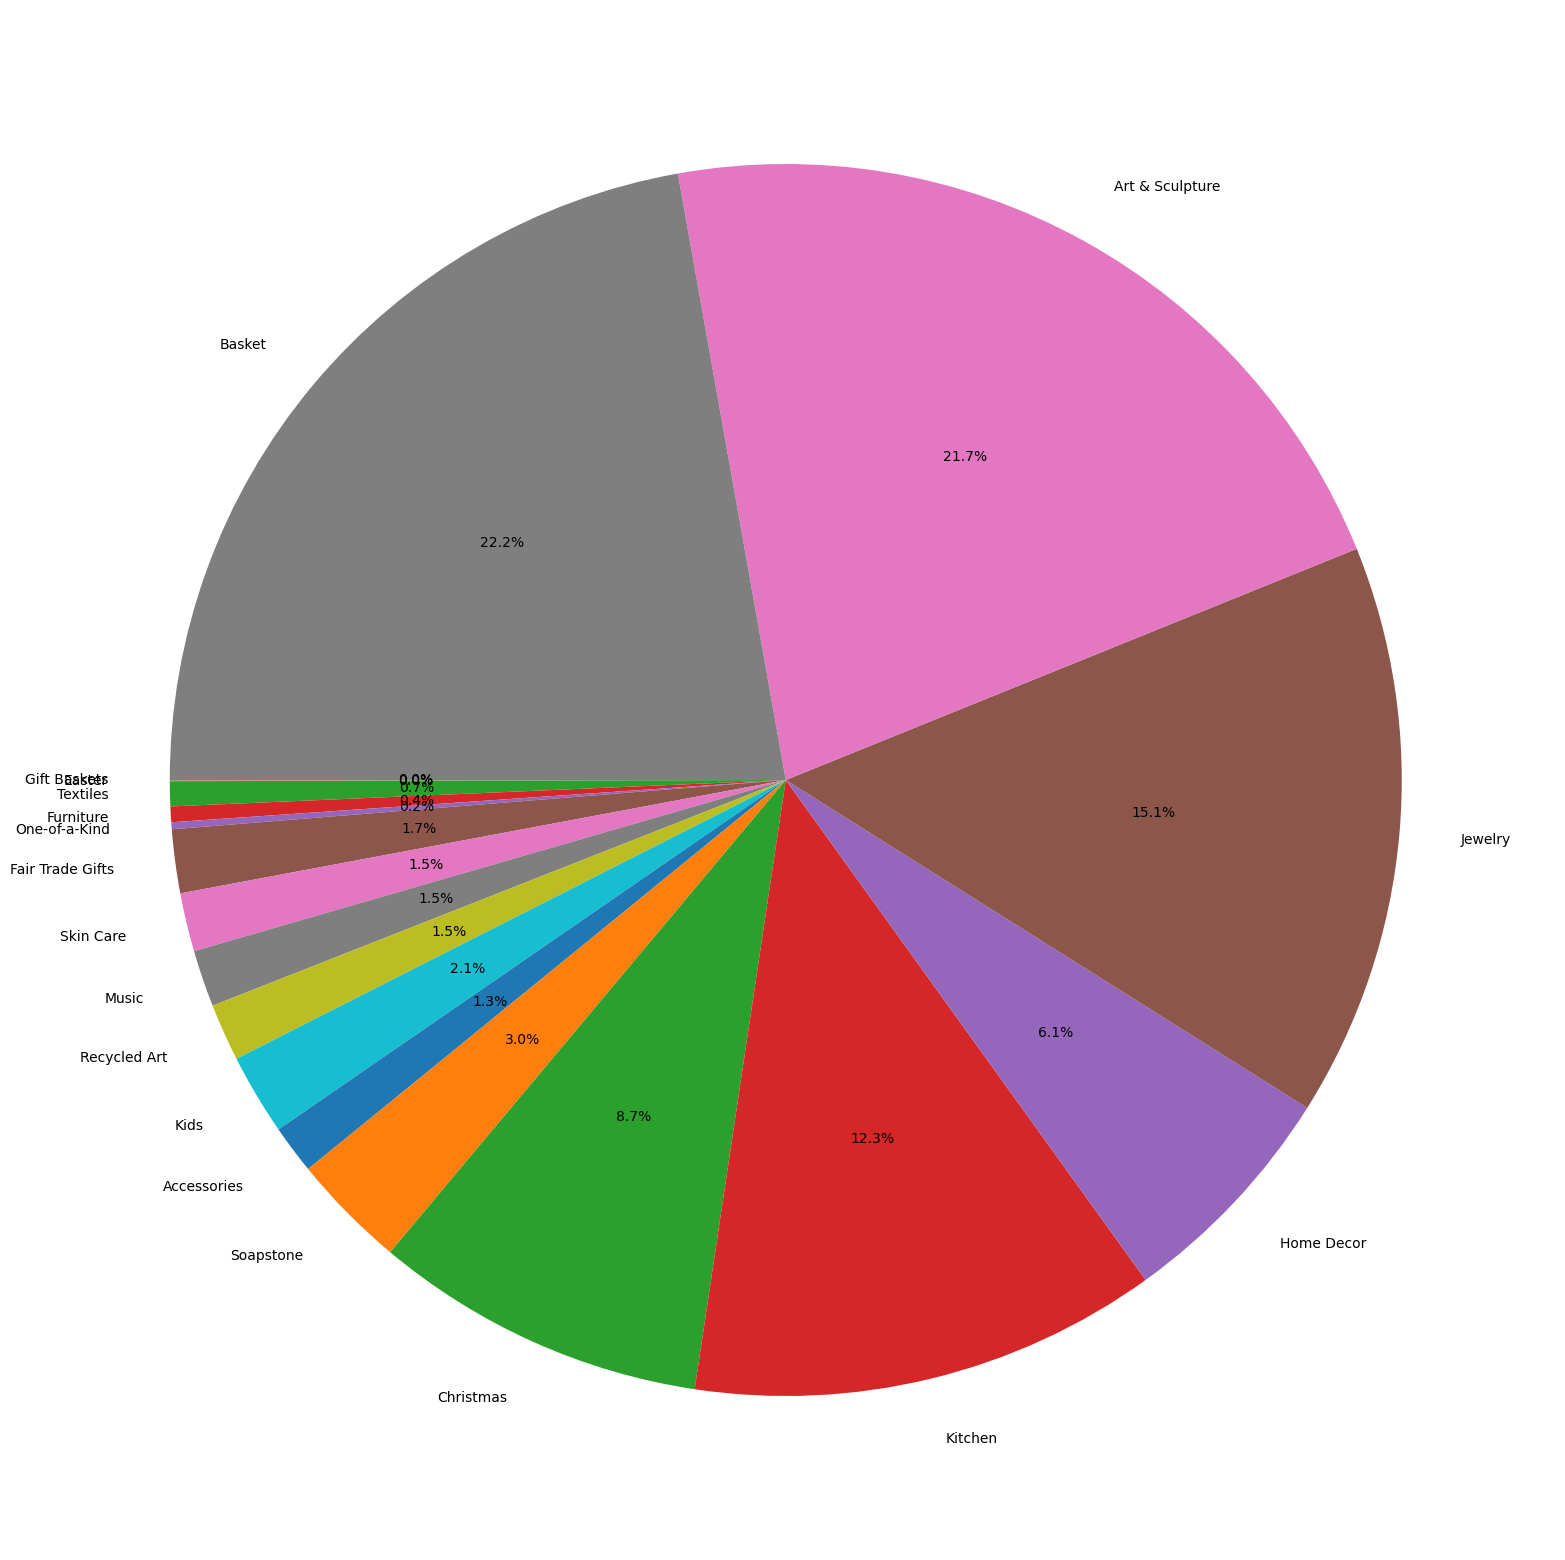

In [31]:
y=sales['Product Type']
x=sales['Net Quantity']
plt.pie(x,labels = y,startangle=180,autopct='%.1f%%',radius=1)
plt.show()